In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
np.random.seed(3116) ##set seed as required$2
from collections import Counter
import random
import warnings
warnings.filterwarnings('ignore')

## Exercise 1: Exploring Movie Recommendation Dataset

In [335]:
#reading user id file
df= pd.read_csv("u.data", 
                       names = ["user_id", "item_id", "rating","timestamp"], sep="\t")
#reading item id file
df_item = pd.read_csv("u.item", 
                       names = ["item_id","movie title","release date","video release date",
              "IMDb URL","unknown","Action","Adventure","Animation",
              "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
              "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
              "Thriller","War","Western"], sep="|",encoding='latin-1')
print("**User-id**")
df.head(1)

**User-id**


,user_id,item_id,rating,timestamp
0,196,242,3,881250949


In [336]:
print("**item id**")
df_item.head(1)

**item id**


,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [337]:
print("Users shape",df.shape,"Item_id shape",df_item.shape)

Users shape (100000, 4) Item_id shape (1682, 24)


### 1) Showcase how the ratings vary across users, as an example consider whether the plot is able to tell if most ratings are only from a handful of users.

**Approach**
The user data i.e u.data is loaded into df.Three graphs are plotted with differene observations<br>
1) First graph is about number of times, a rating among (1,2,3,4,5) is rated by any user. For this, No.of users including repeated users for each rating are found as the length of the subgroup of df after grouping by 'rating'. <br>
2) The second graph is about  unique number of users for each rating. For this set of subgroup is used for the same subgroup mentioned above.<br>
3) The third graph is a histogram that shows the number of users per range of count of ratings. For this, the dataframe is grouped by 'user_id' and respective number of ratings per user are collected from the length of subgroups into a dictionary. This dictioanry is sorted and in ascending order and is used for the histogram.<BR>
4) All observations are commented below the graphs<br>

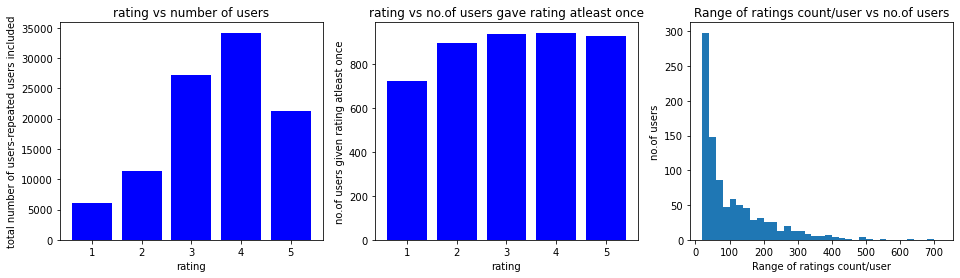

In [338]:
# First graph
user_rating=[len(j) for i,j in df.groupby('rating')]
# Second graph
user_atleast_once=[len(set(j.tolist())) for i,j in df.groupby('rating')['user_id']]
# Third graph
df_g=df.groupby('user_id')
user_rat_count={}
for user_id, sub_group in df_g:
    user_rat_count[user_id]=len(sub_group)
sorted_user_rat_count=dict(sorted(user_rat_count.items(),reverse=True, key=lambda kv: kv[1]))
ratings_frequency=sorted_user_rat_count.values()

#Plotting
titles=['rating vs number of users','rating vs no.of users gave rating atleast once','Range of ratings count/user vs no.of users']
y=[user_rating,user_atleast_once,ratings_frequency]
x_label=["total number of users-repeated users included","no.of users given rating atleast once"]
fig, axs = plt.subplots(1,3, figsize=(16,4))
axs = axs.ravel()
for j in range(3):
    if j!=2:
        axs[j].set_title(f"{titles[j]}")    
        axs[j].bar(range(1, 6), y[j], color='blue')
        axs[j].set_ylabel(x_label[j])
        axs[j].set_xlabel('rating')
        
    else:
        axs[j].set_title(f"{titles[j]}")    
        axs[j].hist(y[j], bins=list(range(min(y[j]),max(y[j]),20)))
        axs[j].set_xlabel('Range of ratings count/user')
        axs[j].set_ylabel('no.of users')
plt.show()

### comment on plot<br>
1) **First plot**: From this plot, Most of the user ratings is "4". More than 30000 ratings are "4". <br>
2)**Second plot**: From this plot, the rating "3" and "4" are given by most of the users i.e almost 900 users for atleast one time. Most of users tend to give higher ratings than the least rating "1".<br>
3) **Third plot**: From this plot, most ratings ranges that is the (ratings count per user)>500 is given by less than 10 users. While the (ratings count per user)=20 is for almost 300 users.<br>

### 2) Showcase how the ratings vary across items.

**Approach**<br>
**Approach**
The item/movie data i.e 'u.item' data is loaded into df_item.Three graphs are plotted with differene observations<br>
1) First graph is about number of times, a rating among (1,2,3,4,5) is rated to any movie. For this, No.of movies including repeated movies for each rating are found as the length of the subgroup of df_item after grouping by 'rating'. <br>
2) The second graph is about  unique number of movies for each rating. For this set of subgroup is used for the same subgroup mentioned above.<br>
3) The third graph is a histogram that shows the number of movies per range of count of ratings. For this, the dataframe is grouped by 'item_id' and respective number of ratings per movies are collected from the length of subgroups into a dictionary. This dictioanry is sorted and in ascending order and is used for the histogram.<BR>
4) All observations are commented below the graphs<br>

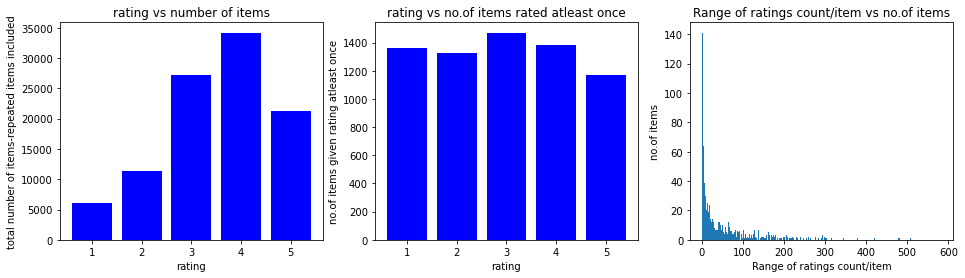

In [339]:
# First graph
item_rating=[len(j) for i,j in df.groupby('rating')]
# Second graph
item_atleast_once=[len(set(j.tolist())) for i,j in df.groupby('rating')['item_id']]
# Third graph
df_g_item=df.groupby('item_id')
item_rat_count={}
for item_id, sub_group in df_g_item:
    item_rat_count[item_id]=len(sub_group)
sorted_item_rat_count=dict(sorted(item_rat_count.items(),reverse=True, key=lambda kv: kv[1]))
ratings_frequency=sorted_item_rat_count.values()

#plotting
titles=['rating vs number of items','rating vs no.of items rated atleast once','Range of ratings count/item vs no.of items']
y=[item_rating,item_atleast_once,ratings_frequency]
x_label=["total number of items-repeated items included","no.of items given rating atleast once"]
fig, axs = plt.subplots(1,3, figsize=(16,4))
axs = axs.ravel()
for j in range(3):
    if j!=2:
        axs[j].set_title(f"{titles[j]}")    
        axs[j].bar(range(1, 6), y[j], color='blue')
        axs[j].set_ylabel(x_label[j])
        axs[j].set_xlabel('rating')
        
    else:
        axs[j].set_title(f"{titles[j]}")    
        axs[j].hist(y[j], bins=list(range(min(y[j]),max(y[j]),1)))
        axs[j].set_xlabel('Range of ratings count/item')
        axs[j].set_ylabel('no.of items')
plt.show()

### Comment on plot<br>
1)**First plot**: This is similar to the first plot of user plots. Here also  most of the item ratings is "4". More than 30000 ratings are "4".<br>
2)**Second plot**:From the second plot, most movies got the rating 3 at least once i.e about 1450 movies among 1682 movies got rating "3" atleast once<br>
3)**Third plot**:From the third plot, about 140 movies are rated only once. While the (ratings count per item)>500 for about 2 to 3 items. <br>

### 3) Are there genres that are more highly rated than others?
**Approach**<br>
1)To link ratings and genres,the two df of user and items are merged on to "item id"<br>
2) From this new df, average ratings for each genre is obtained by grouping by each 'genre' and finding the mean of resopective ratings.<br>

In [340]:
genres=["unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy",
              "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
new_df=df_item.drop(columns=[ 'movie title' , 'release date' , 'video release date' ,'IMDb URL'])
# new_df=new_df.rename(columns={"movie id": "item_id"})
new_df=df.merge(new_df,on=['item_id'])
new_df.head(2)

,user_id,item_id,rating,timestamp,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


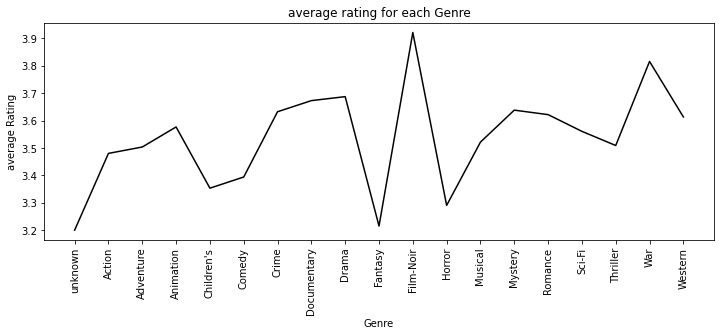

In [341]:
avg_rating={}
for g in genres:
    for i,j in new_df.groupby(g)['rating']:
        if i==1:
            avg_rating[g]=j.mean()
l=genres
average_g=list(avg_rating.values())
plt.figure(figsize=(12,4))
plt.plot(genres, average_g, color='black')
plt.title('average rating for each Genre')
plt.xlabel('Genre')
plt.ylabel('average Rating') 
plt.xticks(rotation=90)
plt.show()
    

### Comment on plot<br>
**Among all genres, FilmNoir is highly rated than others.**

### 4) What age groups prefer what genres based on ratings? You can bin respective ages to your preference.

1)To link ages and genres and ratings, the user_data is merged on the new df obtained above on 'user_id'. 10 years is take as the range of age. The minimum age is 7 and the maximum is 73. <br>
2) A while loop is created to iterate untill a conter "k" <=73<br>
3) 2 limits such as lower and upper limits are defined to set the boundaries for age. These are updated in the while loop for each iteration.<br>
4) The respective rows with in this age limit are taken using ".loc" and average rating is calculated for each genre by groping the selected rows by each genre.<br>
5) In each age group, the respective prefered genre is highlighted. No separate comment is added as they are clearly highlighted.<br>

In [342]:
user_data=pd.read_csv("u.user",sep=r"|",
                 names=["userid" , "age" , "gender" , "occupation" , "zip code" ])
user_data=user_data[['userid','age']].rename(columns={'userid':'user_id'})
user_data.head(2)

,user_id,age
0,1,24
1,2,53


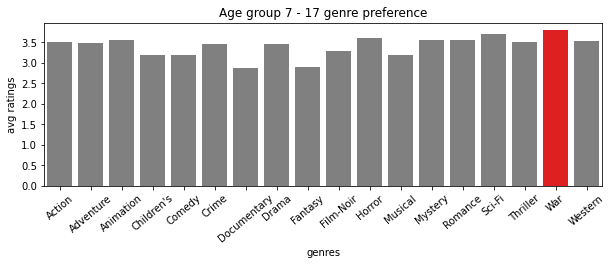

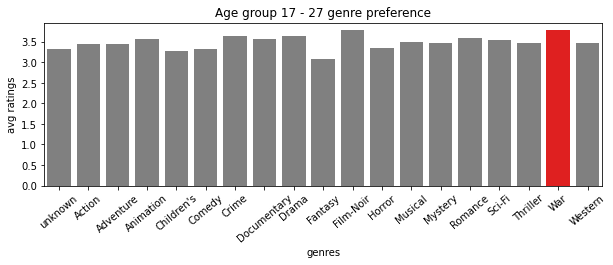

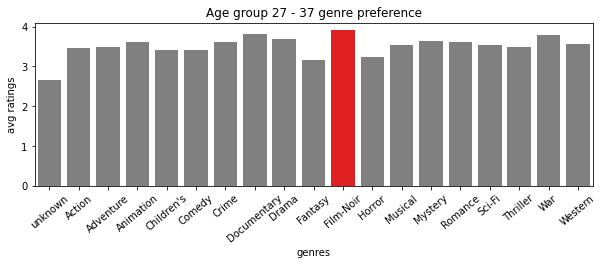

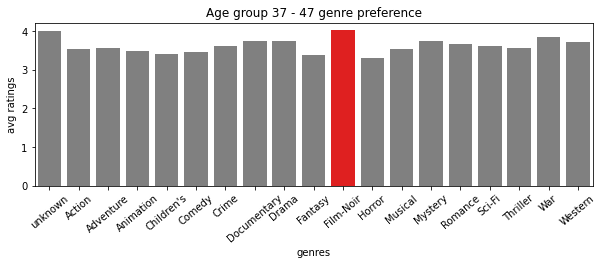

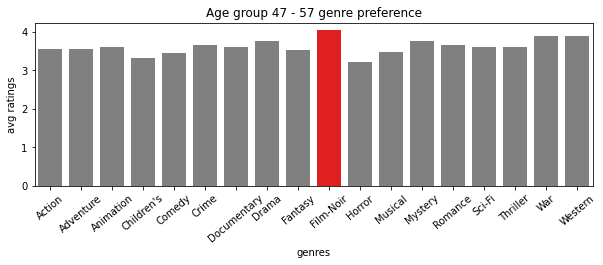

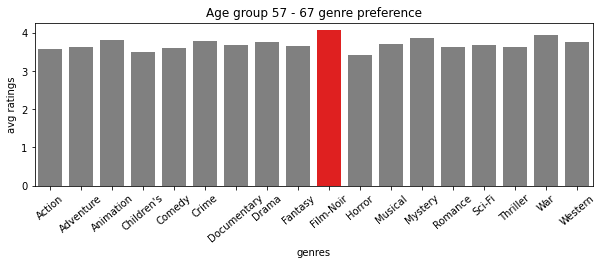

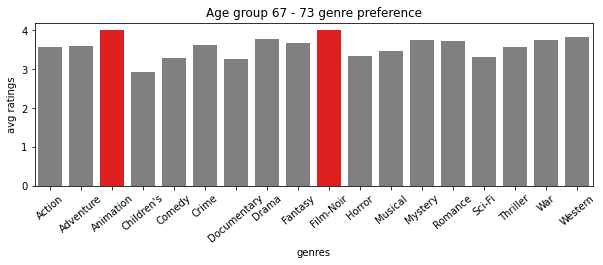

In [343]:
#merging
import seaborn as sb
age_df=new_df.merge(user_data,on=['user_id'])

age_max,age_min=age_df['age'].max(),age_df['age'].min()
k=age_min
lw_limit=age_min
while k<=age_max:
    avg_age_rating={}
    up_limit=min(lw_limit+10,age_max)
    age_group_df = age_df.loc[(age_df['age']>=lw_limit) & (age_df.age<(up_limit))]
    lw_limit=up_limit
    for g in genres:
        for i,j in age_group_df.groupby(g)['rating']:
            if i==1:
                avg_age_rating[g]=j.mean()
    genres_l=list(avg_age_rating.keys())
    avg_ratings_l=list(avg_age_rating.values())
    k=k+10
    
#     #plotting
    plt.figure(figsize=(10,3))
    plt.xlabel('genres')
    plt.ylabel('avg ratings') 
    plt.title(f'Age group {k-10} - {min(k,age_max)} genre preference')
    clrs = ['grey' if (x < max(avg_ratings_l)) else 'red' for x in avg_ratings_l ]
    sb.barplot(x=genres_l, y=avg_ratings_l, palette=clrs) # color=clrs)
    plt.xticks(rotation=40)
    plt.show()   

## Excercise2: Implementing basic matrix factorization (MF) technique for recommender systems 

In this task you are required to implement a matrix factorization (MF) technique for recommender systems.
You are given a rating matrix Rn×m and you have to learn latent matrices P
n×k
and Qk×m, where n is the
number of users, m is the number of items and k the latent dimensions. You can solve the MF problem by
implementing Stochastic Gradient Descent (SGD) learning algorithms (Algorithm LearnLatentFactors on
slide 29). Measure the prediction quality (the RMSE score) on the validation and test dataset. You can set
10%/10% of ratings aside for validation and testing.
• normalize your data
• optimize the hyper-parameters i.e. λ regularization constant, α learning rate, k latent dimensions.
• Compute the validation RMSE.
• Compute the test RMSE.

**Preprocessing**<br>
1) The user item and rating data is taken fom "u.data" into df. For coinciding with indices of numpy matrices, the user id and item id are substracted by -1.There are 943 users and 1682 items.
2)The train, test and validations splits are takes as 80%,10% & 10% using sampling and dropping methods.<br>
3) For **nomalization**, the train dataset mean and standard deviation are taken and are used for nomalizing train,test and validation. This yielded negative values in rating. This is made positive by adding the absolute of the minimum value of the rating to the rating column.<br>
4) This furteher created a rating "0". This may be confused with non rated movie by a user, when a reting matrix is created. To avoid this, the "0" rating is replaced by "0.1"<br>

In [401]:
c_names = ["user_id", "item_id", "rating","timestamp"]
df= pd.read_csv("u.data", 
                       names =c_names, sep="\t")

df = df.sample(frac=1,random_state=3116)
df["user_id"],df["item_id"] =df["user_id"]-1, df["item_id"]-1  # for coinciding with indices of numpy arrays

item_list=np.unique(df["item_id"])
user_list=np.unique(df["user_id"])
print(f"user_id:{len(user_list)},item_id:{len(item_list)}")

user_id:943,item_id:1682


In [402]:
train, test, val = pd.DataFrame(columns = c_names), pd.DataFrame(columns = c_names), pd.DataFrame(columns = c_names)

train=df.sample(int(0.8*len(df)))
tmp_df=df.drop(train.index)

val=tmp_df.sample(int(0.5*len(tmp_df)))
test=tmp_df.drop(val.index)

###  • normalize your data 

In [403]:
mean = train.rating.mean()
std = train.rating.std()
train.rating = (train.rating-mean)/std
test.rating=(test.rating-mean)/std
val.rating=(val.rating-mean)/std

train["rating"]+= np.abs(np.min(train.rating))
test["rating"]+=np.abs(np.min(test.rating))
val["rating"]+=np.abs(np.min(val.rating))

In [404]:
print("unique ratings of data after normalization :")
print(np.unique(train["rating"]))

unique ratings of data after normalization :
[0.         0.887931   1.77586199 2.66379299 3.55172399]


In [405]:
train["rating"].replace({0.: 0.1}, inplace=True)
test["rating"].replace({0.: 0.1}, inplace=True)
val["rating"].replace({0.: 0.1}, inplace=True)

In [406]:
print(train.shape,test.shape,val.shape)

(80000, 4) (10000, 4) (10000, 4)


### Matrix Factorization<br>
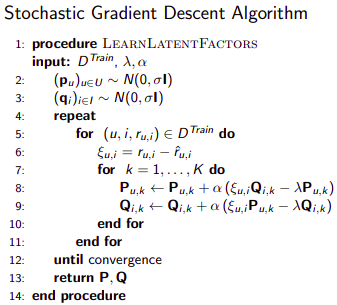

**Approach**<br>
1) Following the above algorithm, a function called "training conventional" is created. This takes the data to be trained on, hyper parameters regularization factor lamda, learning rate and number of latent factor as k<br>
2) Latent matrices P(MXK)and Q(NXK) are initialized with normal distributions of zero mean and unit standard deviatio, where M is the number of users, N is the number of items and K is the latent dimensions<br>
3) In the training dat, each set of user,respective movie and rating are zipped together. As per stochastic Gradient Descent, iterating through such point, rating of the respective user "u" and item "i" combiantion is claculated as the dot product of P[u] and Q[i]<Br>(One thing to mention is here Q is taken as (NXK) i.e movies as rows and "K" as columns" as per the algorithm).<Br>
4) Then error between predicted and actual rating is calculated and is used to updated the respective P and Q latent at the corresponding user and item rows. This is done as shown in the alogorithm by iterating through each latent dimension. the learning rate and lamda are here used for the update<br>
5) After each epoch over all training points, the respective loss and rmse is calculated. The history of traing rmse and validation rmse is recorded and is plotted with best parameters of hyperparameter search.<br>

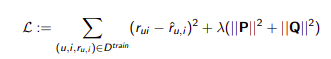

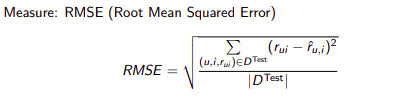

**Loss function and rmse**
To calculate the loss, the updated P and Q matrices are taken. For each data point, the rating is predicted and the error is evaluated. Using the loss and RMSE formulas as mentioned above, the loss and RMSE are evaluated.<br>
**Hyperparameter search**<br>
1) Grid search is done over hyper-parameters i.e. λ regularization constant, α learning rate, k latent dimensions.<br>
2) The model is trained on each combination of the parameters. The learnt matrices "P" and "Q" is takend and  respective validation rmse is evaluated. By keeping tracking the global minimum validation rmse, the best hyperparameters, P and Q matrices with minimum validation loss are taken out. The minimum validation loss is reported as the validation loss wiht best hyper parameters.<Br>
3) The test loss is then evaluated and reported on test data, using the final best "P","Q" and best hyperparameters.<br>
4) With the best parameters, the train and validation rmse are plotted for each epoch. The train rmse continued to decrease but validation rmse converged at less than 20 iterations.<br>

In [350]:
def loss(df,P,Q,lmbd):
    users_l,items_l,ratings_l=df["user_id"],df["item_id"],df["rating"]
    N=len(df)
    error=0
    for u,i,r in zip(users_l,items_l,ratings_l):
        r_hat= P[u].dot(Q[i])
        error+=((r-r_hat)**2)
    loss_value=error+lmbd*((P**2).sum() +(Q**2).sum())
    rmse=np.sqrt(error/N)
    return loss_value,rmse

In [351]:
def training_conventional(train,val,lmbd,lr,K):
    tolerance=0.001
    M,N=len(np.unique(df["user_id"])),len(np.unique(df["item_id"]))
    P = np.random.normal(0,1,(M,K))
    Q = np.random.normal(0,1,(N,K))
    users_l,items_l,ratings_l=train["user_id"],train["item_id"],train["rating"]
    rmse_train_l,rmse_val_l=[],[]
    for e in range(100):
        for u,i,r in zip(users_l,items_l,ratings_l):
            r_hat= (P[u].dot(Q[i]))
            error = (r - r_hat)
            for k in range(K):
                P[u,k]+=(lr*(error*Q[i,k] - lmbd*P[u,k]))
                Q[i,k]+=(lr*(error*P[u,k] - lmbd*Q[i,k]))
        l,rmse_train= loss(train,P,Q,lmbd)
        rmse_train_l.append(rmse_train)
        _,rmse_val = loss(val,P,Q,lamda)
        rmse_val_l.append(rmse_val)
        if l < tolerance:
            break
    return P,Q,rmse_train_l,rmse_val_l

###  • Optimize the hyper-parameters i.e. λ regularization constant, α learning rate, k latent dimensions.
### • Compute the validation RMSE.

In [352]:
lmbds = [1e-1,1e-2, 1e-4]
lrs = [1e-2,1e-3,1e-4]
ks = [1,3,5]
min_rmse = 100000000
rmse_list=[]
for lamda in lmbds:
    for lr in lrs:
        for k in ks:
            P,Q,_,_= training_conventional(train,val,lamda,lr,k) 
            _,rmse = loss(val,P,Q,lamda)
            rmse_list.append(rmse)
            if rmse<min_rmse:
                best_lamda,best_lr,best_k,best_P,best_Q = lamda,lr,k,P,Q
                min_rmse =rmse

In [353]:
print(f'best_lmbd is {best_lamda}')
print(f'best_lr is {best_lr}')
print(f'best_k is {best_k}')
print(f'minimum validation rmse is {min_rmse}')

best_lmbd is 0.1
best_lr is 0.01
best_k is 5
minimum validation rmse is 0.8125157825379627


### • Compute the test RMSE.

In [354]:
_,test_rmse=loss(test,best_P,best_Q,best_lamda)
print(f'test rmse is {test_rmse}')

test rmse is 0.8223584018228138


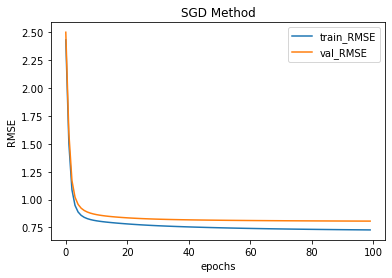

In [355]:
#With the best parameters:best_lamda,best_lr,best_k=0.01,0.001,5
P,Q,rmse_train_h,rmse_val_h= training_conventional(train,val,best_lamda,best_lr,best_k) 
_,val_rmse = loss(val,P,Q,lamda)
plt.plot(rmse_train_h,label='train_RMSE')
plt.plot(rmse_val_h,label='val_RMSE')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('SGD Method')
plt.show()


**Comment**
The train rmse continued to decrease but validation rmse converged at less than 20 iterations

## Exercise 3: Recommender Systems using matrix factorization sckit using coordinate descent

In this task you are required to use off-the-shelf libraries such as libmf or sckit-learn. You have to learn a
matrix factorization model using coordinate descent method. Optimize the hyper parameters and perform a
3-fold cross validation. Compare your results with the results in task 1.  Present your results in form of plots and tables

#### List in detail which/how you used these libraries?, what it solves?, and why it is selected?.
**Approach**
1) I used Non-Negative Matrix Factorization (NMF) of scikit learn.<br>
2) This is chosen because it also approximates two non negative matrixes (W & H) such that product of W and H, approximates the non- negative matrix X. This is quite simiar to the  required objective of Matrix factorization where the goal is to learn latet matrices P and Q similar to W & H here. The product of P&Q should approximate the rating matrix R. Here in NMF, the "R" is "X". <br>
3) It also has Coordinate descent as one of the 2 solvers. It uses ElasticNet regularization. The latent matrix P is obtained first. Later the matrix Q is optimized which is different in stochastic graidient descent. In SGD, each element of Matrix P and after that element of Q are updated for each data point<br>

**Training**<br>
1)To train, a fucntion called "training_scikit" is created. In this function, to perform 3 fold cross validation, first train and validation splits are concatenated and the function KFold(n_splits=3) is used. kf.split gives the indexes for train and validation data.<br>
2) Iterating through train and validation indexes, tranin and validation sets are taken. The model "mf" is created using "NMF" with solver as coordinate descent. This takes train data as a matrix. So, sparse matrix using "csr_matrix()" is created for the training data. The CSR format stores the sparse matrix in row form using three (one-dimensional) arrays. This format allows fast row access. <br>
3) The NMF also also takes the hyper parameters of learning rate alpha,regularization lamda and k latent dimension.<br>
4) The latent matrix "P" is first calculated using ".fit_transform(train_sparse_m)". Later the matrix "Q" is obtained using mf.components_<br>
5) validation rmse is evaluated similar to the process already mentioned.<br>
6) The validation rmse per each old is gathered and is averaged for final validation rmse.<br>
7) For hyperparameter search, similar to the method in task 2, gridsearch is done on all combinations. The parameters with minimum validation loss is taken as the best parameters and and best latent matrics "P" and "Q". With the obtained, best parameters, the model is trained to get P and Q. With this P and Q, the final test loss is also reported. Here P, Q obtained in K cross validation are not taken as they belong to different splits. <br>

REf:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [356]:
def rmse_scikit(df,P,Q):
    users_l,items_l,ratings_l=df["user_id"],df["item_id"],df["rating"]
    N=len(df)
    error=0
    for u,i,r in zip(users_l,items_l,ratings_l):
        r_hat= P[u].dot(Q[:,i])
        error+=((r-r_hat)**2)
    rmse=np.sqrt(error/N)
    return rmse

In [357]:
#https://machinelearningmastery.com/sparse-matrices-for-machine-learning/
from scipy.sparse import csr_matrix
def user_item_sparse(train):
    ratings,users,items=train['rating'],train['user_id'],train['item_id']
    M,N=len(np.unique(df["user_id"])),len(np.unique(df["item_id"]))
    train = csr_matrix((ratings,(users,items)),shape=(M,N))                     
    return train

In [358]:
from sklearn.model_selection import KFold
from sklearn.decomposition import NMF
def training_scikit(train_scikit,alpha,k,lmbd):
    val_RMSE=[]
    k_fold=3
    kf = KFold(n_splits=3)
    for train_index, test_index in kf.split(train_scikit):
        train_f,test_f = train_scikit.iloc[train_index],train_scikit.iloc[test_index]
        train_sparse_m = user_item_sparse(train_f)
        mf = NMF(solver = 'cd',alpha = alpha, n_components = k, l1_ratio = lmbd, random_state=3116,max_iter=100)  ##set max_iter=40 to be consistent as in ex2
        P = mf.fit_transform(train_sparse_m)
        Q = mf.components_
        rmse=rmse_scikit(test,P,Q)
        val_RMSE.append(rmse)
        mean_rmse=sum(val_RMSE)/(k_fold)
    return mean_rmse

In [373]:
train_scikit=pd.concat((train,val),axis=0)[['user_id','item_id','rating']]
train_scikit.reset_index(inplace=True,drop=True)
lmbds = [1e-1,1e-2, 1e-4]
lrs = [1e-2,1e-3,1e-4]
ks = [1,3,5]
rmse_scikit_l=[]
min_rmse_scikit = 1000000000000
for lamda in lmbds:
    for alpha in alphas:
        for k in ks:
            val_rmse=training_scikit(train_scikit,alpha,k,lamda)
            rmse_scikit_l.append(val_rmse)
            if val_rmse<min_rmse_scikit:
                best_lamda,best_alpha,best_k= lamda,alpha,k
                min_rmse_scikit =val_rmse

In [374]:
print(f'best_lmbd is {best_lamda}')
print(f'best_alpha is {best_alpha}')
print(f'best_k is {best_k}')
print(f'minimum validation rmse is {min_rmse_scikit}')

best_lmbd is 0.0001
best_alpha is 0.0001
best_k is 5
minimum validation rmse is 1.952357297111637


In [366]:
mf = NMF(solver = 'cd', alpha = best_alpha, n_components = best_k, l1_ratio = best_lamda,random_state=3116,
                                                                                             max_iter=100)
train_sparse_m = user_item_sparse(train_scikit)
P = mf.fit_transform(train_sparse_m)
Q = mf.components_

test_rmse_scikit=rmse_scikit(test,P,Q)
print(f'test rmse is {test_rmse_scikit}')

test rmse is 1.748217266256859


### Compare your results with the results in task 1. Present your results in form of plots and tables.
From the results, it is visible that, Conventional method showed better performance over NMF  method. This may be due to the stochastic gradient descent process that update the each element of matrices and P and Q for each data point which is not the case in NMF method using Coordinate DEscent. The regularization is also different. IN the first method, L2 regularization used. But, the NMF method K fold cross valdation. Some more better result can be expected with the NMF method. I tried with different parameters. But could not improve further. 

In [382]:
data=[['best lamda',0.1,0.0001],['best lr',0.01,0.0001],['best latent dimension k',5,5],['validation rmse',min_rmse,min_rmse_scikit],['test rmse',test_rmse,test_rmse_scikit]]
col_names=['Conventional Method','NMF Method']
print("Table showing the comparison of results from both tasks")
print(tabulate(data, headers=col_names, tablefmt="fancy_grid", showindex="always"))

Table showing the comparison of results from both tasks
╒════╤═════════════════════════╤═══════════════════════╤══════════════╕
│    │                         │   Conventional Method │   NMF Method │
╞════╪═════════════════════════╪═══════════════════════╪══════════════╡
│  0 │ best lamda              │              0.1      │      0.0001  │
├────┼─────────────────────────┼───────────────────────┼──────────────┤
│  1 │ best lr                 │              0.01     │      0.0001  │
├────┼─────────────────────────┼───────────────────────┼──────────────┤
│  2 │ best latent dimension k │              5        │      5       │
├────┼─────────────────────────┼───────────────────────┼──────────────┤
│  3 │ validation rmse         │              0.812516 │      1.95236 │
├────┼─────────────────────────┼───────────────────────┼──────────────┤
│  4 │ test rmse               │              0.895416 │      1.74822 │
╘════╧═════════════════════════╧═══════════════════════╧══════════════╛


In [400]:
#Varying K:
alpha_NMF,lamda_NMF = 0.001,0.001
test_rmse_nbf,test_rmse_normal=[],[]
for k in [1,3,5]:
    mf = NMF(solver = 'cd', alpha = alpha_NMF, n_components = k, l1_ratio = lamda_NMF,random_state=3116,max_iter=50)
    train_sparse_m = user_item_sparse(train_scikit)
    P = mf.fit_transform(train_sparse_m)
    Q = mf.components_
    test_rmse_nbf.append(rmse_scikit(test,P,Q))

In [413]:
test_rmse_normal=[]
lamda_SGD,alpha_SGD=0.1,0.01
for k in [1,3,5]:
    P,Q,_,_= training_conventional(train,val,lamda_SGD,alpha_SGD,k) 
    _,test_rmse = loss(test,P,Q,lamda_SGD)
    test_rmse_normal.append(test_rmse)

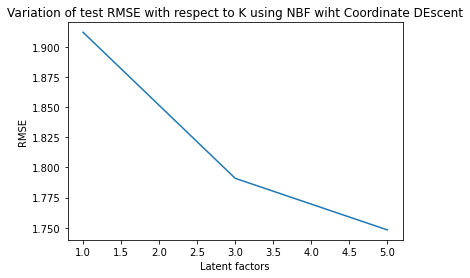

In [414]:
plt.plot([1,3,5],test_rmse_nbf,label='test_RMSE ')
plt.xlabel('Latent factors')
plt.ylabel('RMSE')
plt.title('Variation of test RMSE with respect to K using NBF wiht Coordinate DEscent')
plt.show()


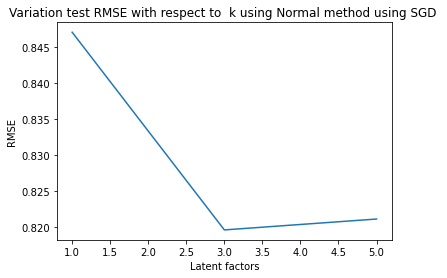

In [416]:
plt.plot([1,3,5],test_rmse_normal,label='test_RMSE ')
plt.xlabel('Latent factors')
plt.ylabel('RMSE')
plt.title('Variation test RMSE with respect to  k using Normal method using SGD ')
plt.show()


**Comment**<br>
The above plots show that, as the latent dimension increases, the test rmse decreased a lot from k=1 to k=3. 